K-Nearest Neighbors (KNN) Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Load dataset

In [5]:
!unzip "/content/archive (6).zip"

Archive:  /content/archive (6).zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [9]:
iris = "/content/database.sqlite"

In [10]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='target')

Normalize the features

In [14]:
 scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Training the KNN model

In [16]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate the initial model

In [17]:
y_pred = knn.predict(X_test)
print("Initial Model Evaluation (k=5):")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Initial Model Evaluation (k=5):
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Trying different K values and plot accuracy

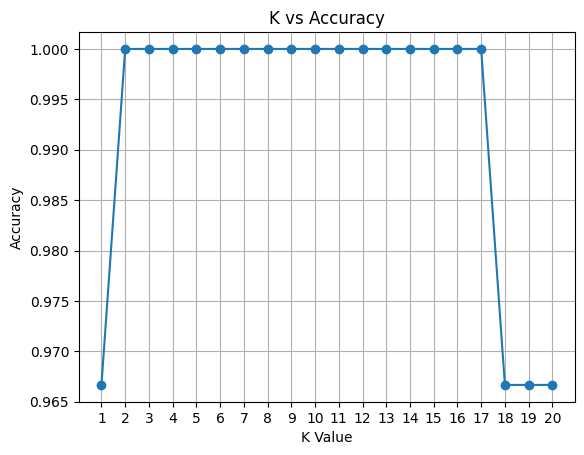

In [18]:
k_range = range(1, 21)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_k = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred_k))

plt.plot(k_range, scores, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy")
plt.xticks(k_range)
plt.grid()
plt.show()


Train final model with best K

In [19]:
best_k = scores.index(max(scores)) + 1
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

Evaluate final model

In [20]:
y_pred = model.predict(X_test)
print("\nFinal Model Evaluation (Best K:", best_k, ")")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Final Model Evaluation (Best K: 2 )
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Visualize decision boundaries (using only 2 features for 2D plot)

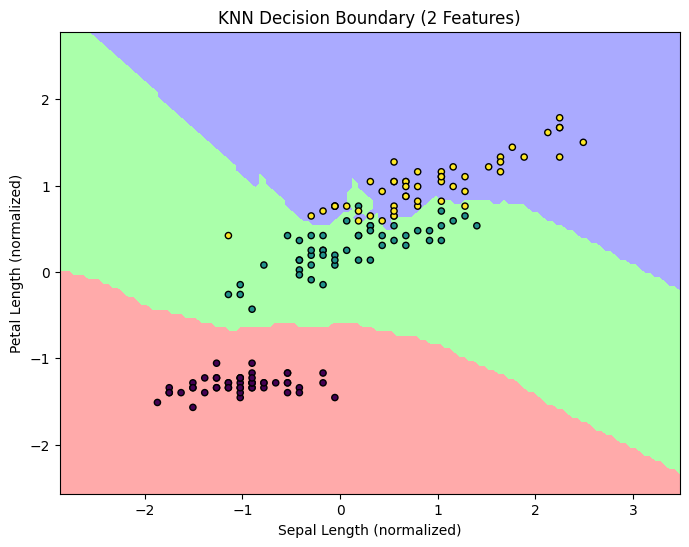

In [21]:
from matplotlib.colors import ListedColormap

X_reduced = X_scaled[:, [0, 2]]  # e.g., sepal length and petal length
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_train_r, y_train_r)

x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                       np.arange(y_min, y_max, 0.05))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_light)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='k', s=20)
plt.title("KNN Decision Boundary (2 Features)")
plt.xlabel("Sepal Length (normalized)")
plt.ylabel("Petal Length (normalized)")
plt.show()